In [284]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [285]:
pd.options.display.max_columns=None

In [286]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [287]:
df.shape

(10683, 11)

In [288]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [289]:
df.dropna(axis=0,inplace=True)

## note that the axis=0 because we want to drop rows that contain null values

In [290]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [291]:
for i in ['Date_of_Journey', 'Dep_Time','Arrival_Time']:
    
    df[i] = pd.to_datetime(df[i])

In [292]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [293]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-09 05:50:00,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-08-09 18:05:00,2021-08-09 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-08-09 16:50:00,2021-08-09 21:35:00,4h 45m,1 stop,No info,13302


In [294]:
df['day_of_journey'] = df['Date_of_Journey'].dt.day
df['month_of_journey'] = df['Date_of_Journey'].dt.month

In [295]:
df.drop('Date_of_Journey' ,axis=1,inplace=True )

In [296]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-09 05:50:00,2021-08-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-09 18:05:00,2021-08-09 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-09 16:50:00,2021-08-09 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [297]:
def extract_hours(dataframe, col):
    dataframe[col + "_hour"]  = dataframe[col].dt.hour
    
def extract_minutes(dataframe, col):
    dataframe[col + "_minutes"]= dataframe[col].dt.minute
    
def drop_column(dataframe, col):
    dataframe.drop(col,axis=1,inplace= True)
    

In [298]:
for i in ['Dep_Time', 'Arrival_Time']:
    extract_hours(df, i)
    extract_minutes(df, i)
    drop_column(df, i)

In [299]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## uniform the forlmula of Duration column as follows (24h 24m)

In [300]:
duration_list = df['Duration'].values

In [301]:
duration_list

array(['2h 50m', '7h 25m', '19h', ..., '3h', '2h 40m', '8h 20m'],
      dtype=object)

In [302]:
for index, time in enumerate(duration_list):
    if len(time.split(' ')) == 2:
        pass
    else:
        if 'h' in time:
            duration_list[index] = duration_list[index] + ' 0m'
        elif 'm' in duration_list[index]:
            duration_list[index] = '0h ' + duration_list[index]
    

## it is very important to use this format ' list[index] ' so you can update the item in the list, otherwise it will not be updated

In [303]:
df['Duration']=duration_list

In [304]:
df['Duration'].head()

0    2h 50m
1    7h 25m
2    19h 0m
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [305]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## how to split hours and minutes in Duration column

In [306]:
# split hours
'2h 50m'.split()[0][:-1]

'2'

In [307]:
# split minutes
'5h 25m'.split()[1][:-1]

'25'

In [308]:
def hour(x):
    return int(x.split()[0][:-1])

def minute(x):
    return int(x.split()[1][:-1])

In [309]:
df['Duration_hours'] = df['Duration'].apply(hour)
df['Duration_minutes']= df['Duration'].apply(minute)

In [310]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [311]:
drop_column(df, 'Duration')

In [312]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [313]:
df.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Total_Stops             object
Additional_Info         object
Price                    int64
day_of_journey           int64
month_of_journey         int64
Dep_Time_hour            int64
Dep_Time_minutes         int64
Arrival_Time_hour        int64
Arrival_Time_minutes     int64
Duration_hours           int64
Duration_minutes         int64
dtype: object

In [314]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

In [315]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [316]:
num_df = df[num_col]
num_df

,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [317]:
cat_df = df[cat_col]
cat_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


<AxesSubplot:xlabel='Airline', ylabel='Price'>

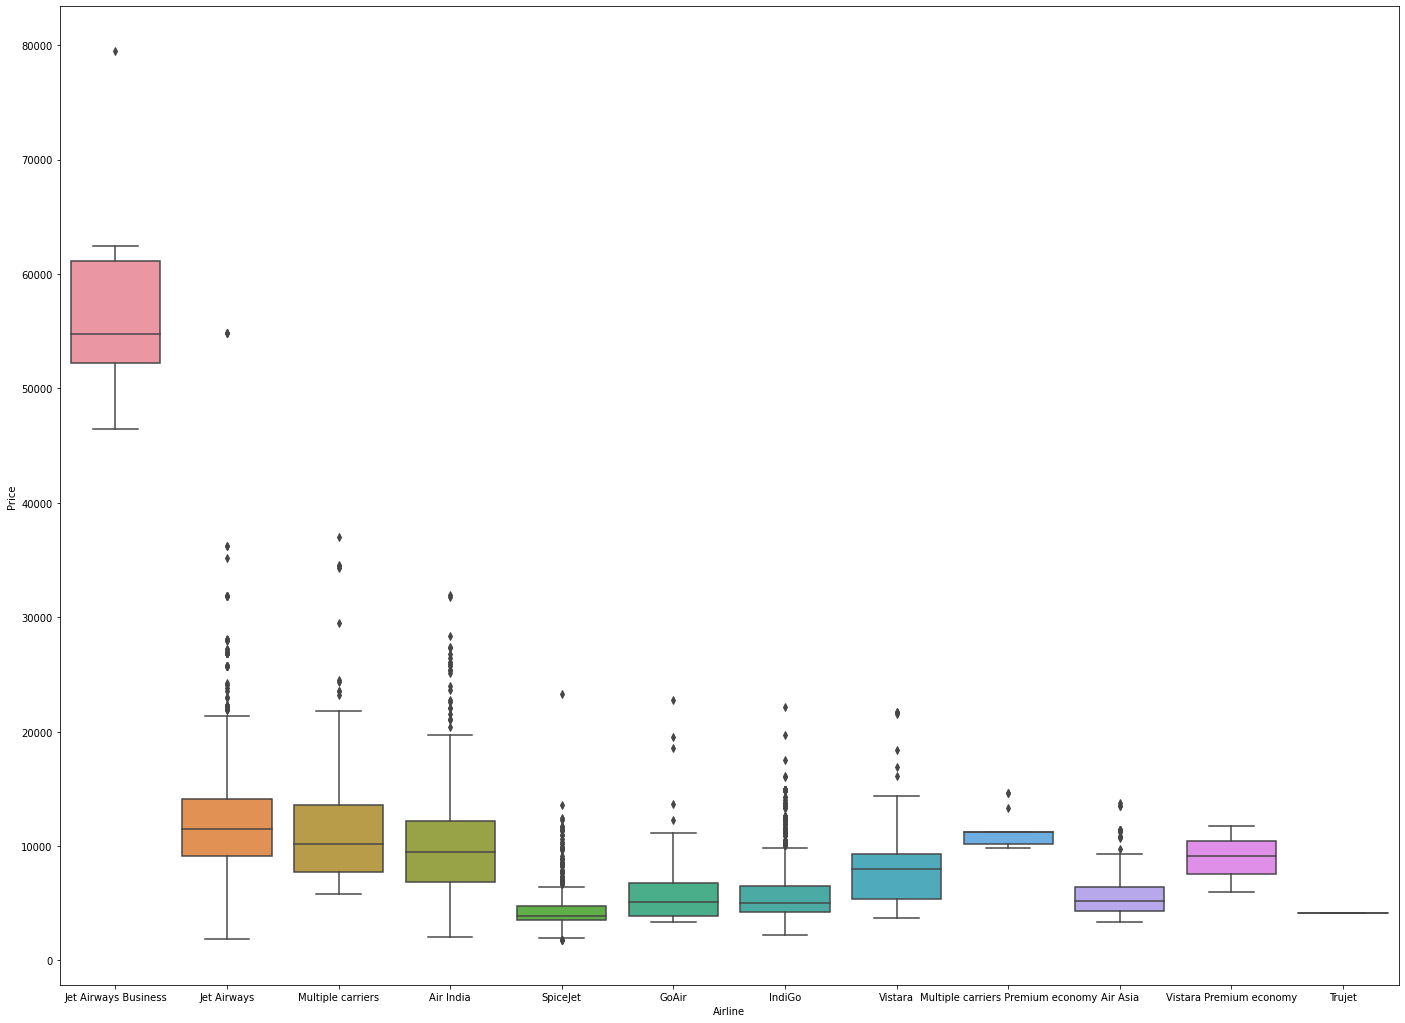

In [318]:
plt.figure(figsize=(16*1.5,12*1.5))
sns.boxplot(x='Airline' , y= 'Price', data=df.sort_values('Price', ascending=False) )

In [319]:
cat_df['Airline'].nunique()

12

## note that the number of columns are 11 and not 12 because of drop_first = true

In [320]:
airline =pd.get_dummies(cat_df['Airline'], drop_first=True)
airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [321]:
source = pd.get_dummies(cat_df['Source'], drop_first= True)
source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [322]:
destination =pd.get_dummies(cat_df['Destination'],drop_first=True)
destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [323]:
cat_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

### we ignored 4 stops because there is only one row contain it

In [324]:
cat_df['Route'].head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [325]:
cat_df['Route_1']=cat_df['Route'].str.split('→').str[0]
cat_df['Route_2']=cat_df['Route'].str.split('→').str[1]
cat_df['Route_3']=cat_df['Route'].str.split('→').str[2]
cat_df['Route_4']=cat_df['Route'].str.split('→').str[3]
cat_df['Route_5']=cat_df['Route'].str.split('→').str[4]

<ipython-input-325-1258b4fd659f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Route_1']=cat_df['Route'].str.split('→').str[0]
<ipython-input-325-1258b4fd659f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Route_2']=cat_df['Route'].str.split('→').str[1]
<ipython-input-325-1258b4fd659f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [326]:
drop_column(cat_df,'Route')

c:\program files\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [327]:
cat_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [328]:
cat_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [329]:
cat_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [330]:
for i in ['Route_3', 'Route_4','Route_5']:
    cat_df.fillna('None', inplace=True)

c:\program files\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [331]:
cat_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [332]:
cat_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [333]:
for i in cat_df.columns:
    print(f'{i} has:\n--->  {len(cat_df[i].unique())}')

Airline has:
--->  12
Source has:
--->  5
Destination has:
--->  6
Total_Stops has:
--->  5
Additional_Info has:
--->  10
Route_1 has:
--->  5
Route_2 has:
--->  45
Route_3 has:
--->  30
Route_4 has:
--->  14
Route_5 has:
--->  6


In [334]:
from sklearn.preprocessing import LabelEncoder

In [335]:
encoder = LabelEncoder()

In [336]:
for col in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    cat_df[col] = encoder.fit_transform(cat_df[col])

<ipython-input-336-13163563a6f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[col] = encoder.fit_transform(cat_df[col])


In [337]:
cat_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [338]:
drop_column(cat_df,'Additional_Info')

c:\program files\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [339]:
cat_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [340]:
dictionery = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [341]:
cat_df['Total_Stops'] = cat_df['Total_Stops'].map(dictionery)

<ipython-input-341-e8092b9aac53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Total_Stops'] = cat_df['Total_Stops'].map(dictionery)


In [342]:
cat_df.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [343]:
dataset = pd.concat([cat_df, airline, destination,source, num_df], axis=1)
dataset

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12648,3,1,11,30,14,10,2,40


In [344]:
drop_column(dataset, 'Airline')
drop_column(dataset, 'Source')
drop_column(dataset, 'Destination')

In [345]:
dataset

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Price,day_of_journey,month_of_journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4107,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4145,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7229,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12648,3,1,11,30,14,10,2,40


In [348]:
def plot(dataframe, col):
    sns.boxplot(dataframe[col])

C:\Users\Abody\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


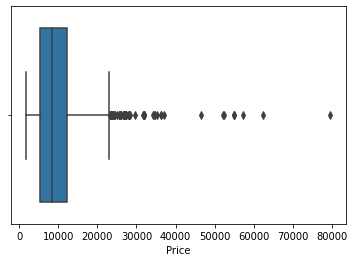

In [349]:
plot(dataset, "Price")

In [350]:
dataset["Price"] = np.where(dataset['Price']>=40000, dataset["Price"].median(), dataset["Price"])

C:\Users\Abody\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


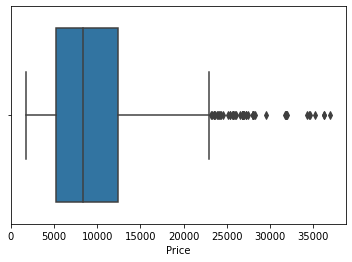

In [351]:
plot(dataset, "Price")

In [352]:
X= dataset.drop('Price', axis=1)
y =dataset["Price"]

In [353]:
X.shape

(10682, 34)

In [354]:
from sklearn.feature_selection import mutual_info_classif

In [355]:
len(X.columns)

34

In [356]:
imp = mutual_info_classif(X,y)

In [357]:
len(imp)

34

In [358]:
important_features = pd.DataFrame(imp,X.columns).reset_index()
important_features.columns = ['Features', "Scores"]
just_sorting =important_features.sort_values('Scores', ascending=False).head(17)

In [363]:
just_sorting

,Features,Scores
2,Route_2,2.778010
3,Route_3,2.251638
0,Total_Stops,2.143811
1,Route_1,2.039014
30,Arrival_Time_hour,1.850283
32,Duration_hours,1.795677
23,Delhi,1.573997
17,Cochin,1.561466
31,Arrival_Time_minutes,1.542049
4,Route_4,1.466970


In [359]:
X=dataset[just_sorting['Features'].values]

In [360]:
X

,Route_2,Route_3,Total_Stops,Route_1,Arrival_Time_hour,Duration_hours,Delhi,Delhi,Cochin,Arrival_Time_minutes,Route_4,Dep_Time_hour,Dep_Time_minutes,day_of_journey,Duration_minutes,Jet Airways,Kolkata,Kolkata,month_of_journey
0,13,29,0,0,1,2,0,0,0,10,13,22,20,24,50,0,0,0,3
1,25,1,2,2,13,7,0,0,0,15,3,5,50,5,25,0,0,1,1
2,32,4,2,3,4,19,0,1,1,25,5,9,25,6,0,1,0,0,9
3,34,3,1,2,23,5,0,0,0,30,13,18,5,5,25,0,0,1,12
4,34,8,1,0,21,4,0,0,0,35,13,16,50,3,45,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5,29,0,2,22,2,0,0,0,25,13,19,55,4,30,0,0,1,9
10679,5,29,0,2,23,2,0,0,0,20,13,20,45,27,35,0,0,1,4
10680,13,29,0,0,11,3,1,0,0,20,13,8,20,27,0,1,0,0,4
10681,13,29,0,0,14,2,0,0,0,10,13,11,30,3,40,0,0,0,1


In [364]:
from sklearn.model_selection import train_test_split

In [365]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [366]:
from sklearn import metrics
import pickle
##dump your model using pickle so that we will re-use
def predict(model_name ,ml_model, dump):
    print(model_name)
    model=ml_model.fit(X_train,y_train)
    if dump ==1:
        with open(f'dumping models/{model_name}model.pkl',mode='wb') as file:
            pickle.dump(model, file)
    
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: %{}'.format(round(r2_score*100,3)))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.histplot(y_test-y_prediction)
    
   

In [367]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

Random Forest
Training score : 0.9457346791476574


r2 score: %78.94
MAE: 1235.7339082942613
MSE: 4168530.5327864233
RMSE: 2041.6979533678393


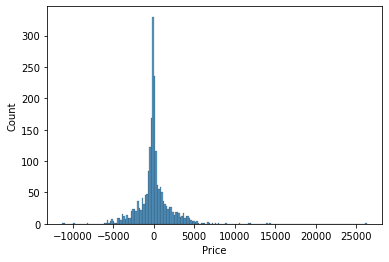

In [368]:
predict('Random Forest',RandomForestRegressor(),1)

Decesion Tree
Training score : 0.8736102984201287


r2 score: %65.646
MAE: 1447.8731867103415
MSE: 6799945.482919982
RMSE: 2607.670508887191


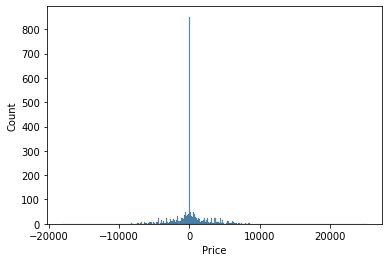

In [369]:
predict('Decesion Tree',DecisionTreeClassifier(),1)

Linear Refression
Training score : 0.581270970677941


r2 score: %57.707
MAE: 2043.432200785005
MSE: 8371365.483410371
RMSE: 2893.331208729891


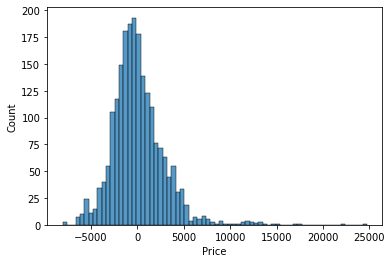

In [370]:
predict('Linear Refression',LinearRegression(),1)

KNN
Training score : 0.7734182120166979


r2 score: %66.629
MAE: 1714.0529714553113
MSE: 6605430.859560131
RMSE: 2570.1032779949


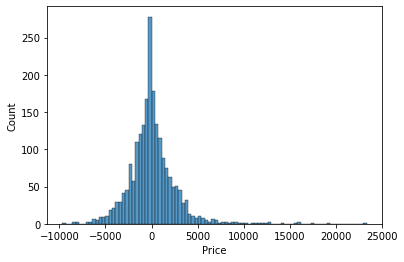

In [371]:
predict('KNN',KNeighborsRegressor(),1)